## Logistic Regression Model to predict Heart Disease

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from imblearn.over_sampling import SMOTE

In [2]:
#Importing the dataset

data=pd.read_csv(r'framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
#All Columns

data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Variables¶
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

#### Demographic:

• Sex: male or female(Nominal)
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

#### Behavioral

• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)


#### Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)


#### Medical(current)

• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
•BMI: Body Mass Index (Continuous)
•Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [4]:
#Basics information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
#Total null values

data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


1. The dataset contains a total of 4,238 rows and 16 columns.  
2. Among the 4,238 entries, the 'education' column has 105 missing values, 'cigsPerDay' has 29, 'BPMeds' has 53, 'totChol' has 50, 'BMI' has 19, and 'glucose' has 388 missing values.

### Analysis

In [6]:
#Defined function for the finding relation of the variables with the risk of coronary heart disease CHD 

def relation(var): 
    return sns.countplot(x=var, hue=data["TenYearCHD"])

def calculation(data, target_col, group_col):
    counts = pd.crosstab(data[group_col], data[target_col])
    counts.columns = ["NotRisk_with", "Risk_with"]
    
    counts["percentage_Risk"] = round((counts["Risk_with"] / (counts["Risk_with"] + counts["NotRisk_with"])) * 100, 2)
    counts["percentage_NotRisk"] = round((counts["NotRisk_with"] / (counts["Risk_with"] + counts["NotRisk_with"])) * 100, 2)
    
    return counts

,NotRisk_with,Risk_with,percentage_Risk,percentage_NotRisk
education,,,,
1.0,1397,323,18.78,81.22
2.0,1106,147,11.73,88.27
3.0,599,88,12.81,87.19
4.0,403,70,14.80,85.20


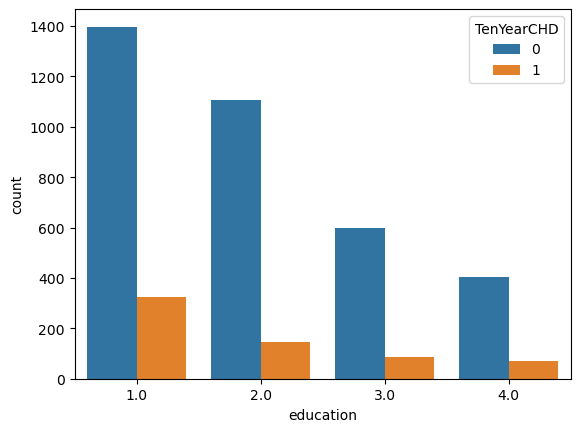

In [7]:
# Education with CHD

relation(data["education"])
calculation(data, "TenYearCHD", "education")

Insight:
    The education has not relation with the 10 year risk of coronary heart disease CHD.

,NotRisk_with,Risk_with,percentage_Risk,percentage_NotRisk
male,,,,
0,2118,301,12.44,87.56
1,1476,343,18.86,81.14


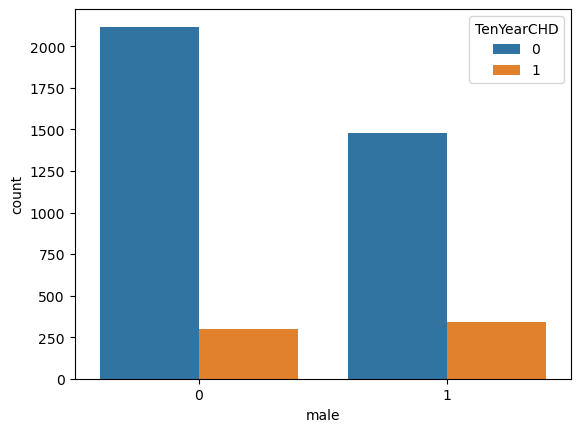

In [8]:
#Gender with CHD

relation(data["male"])
calculation(data, "TenYearCHD", "male")

Insight: Here we can see the male has higher risk of coronary heart disease in next 10 years

,NotRisk_with,Risk_with,percentage_Risk,percentage_NotRisk
age,,,,
32,1,0,0.00,100.00
33,5,0,0.00,100.00
34,18,0,0.00,100.00
35,40,2,4.76,95.24
36,81,3,3.57,96.43
37,88,4,4.35,95.65
38,136,8,5.56,94.44
39,163,6,3.55,96.45
40,176,15,7.85,92.15


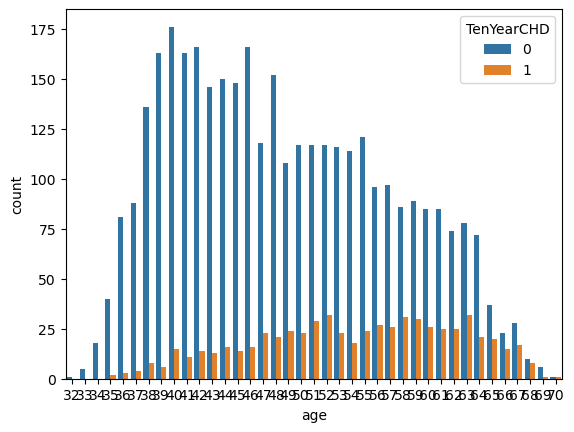

In [9]:
#Age with CHD

relation(data["age"])
calculation(data, "TenYearCHD", "age")

Insight: the older people has higher risk of coronary heart disease in next 10 years

,NotRisk_with,Risk_with,percentage_Risk,percentage_NotRisk
currentSmoker,,,,
0,1833,311,14.51,85.49
1,1761,333,15.90,84.10


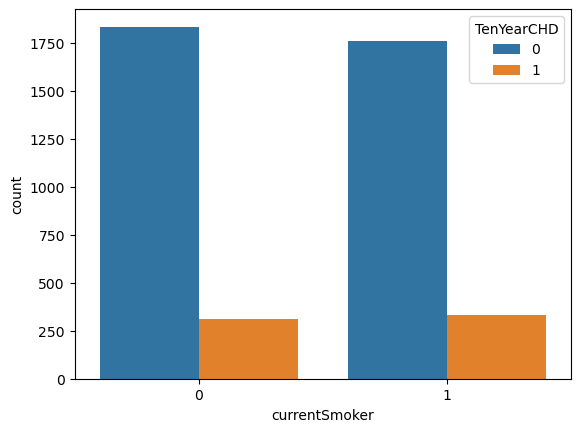

In [10]:
#CurrentSmoker to CHD

relation(data["currentSmoker"])
calculation(data, "TenYearCHD", "currentSmoker")

Insight: Current smoking habbit has not much relation with the risk of coronary heart disease in next 10 years

,NotRisk_with,Risk_with,percentage_Risk,percentage_NotRisk
BPMeds,,,,
0.0,3469,592,14.58,85.42
1.0,83,41,33.06,66.94


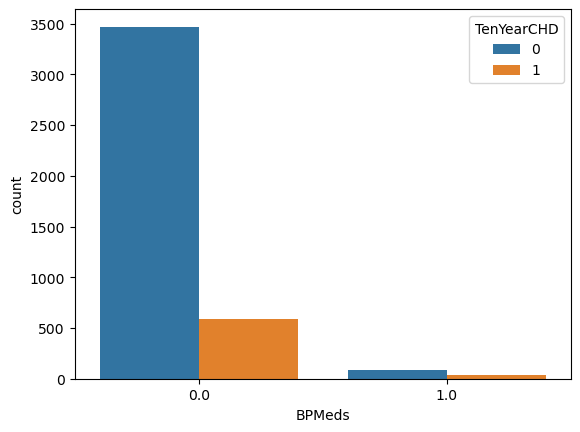

In [11]:
#BPMeds with CHD

relation(data["BPMeds"])
calculation(data, "TenYearCHD", "BPMeds")

Insight: Those who are taking BP medicine have has higher risk of coronary heart disease in next 10 years

,NotRisk_with,Risk_with,percentage_Risk,percentage_NotRisk
prevalentStroke,,,,
0,3580,633,15.02,84.98
1,14,11,44.00,56.00


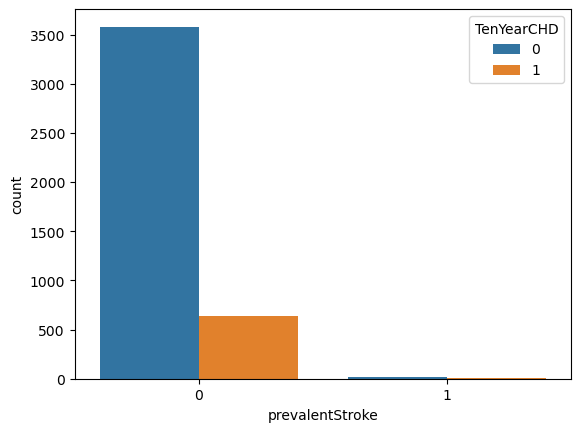

In [12]:
#PrevelentStroke with CHD

relation(data["prevalentStroke"])
calculation(data, "TenYearCHD", "prevalentStroke")

Insight: Those who had prevalentstroke have higher risk of coronary heart disease in next 10 years

,NotRisk_with,Risk_with,percentage_Risk,percentage_NotRisk
prevalentHyp,,,,
0,2603,319,10.92,89.08
1,991,325,24.70,75.30


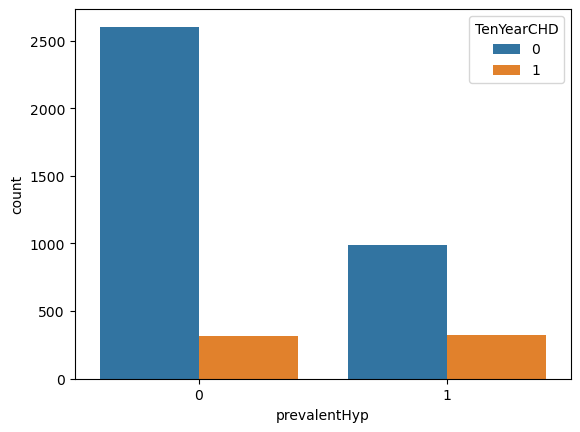

In [13]:
#PrevalentHyp with CHD

relation(data["prevalentHyp"])
calculation(data, "TenYearCHD", "prevalentHyp")

Insight:Those who have PrevalentHyp have higher risk of coronary heart disease in next 10 year

,NotRisk_with,Risk_with,percentage_Risk,percentage_NotRisk
diabetes,,,,
0,3525,604,14.63,85.37
1,69,40,36.70,63.30


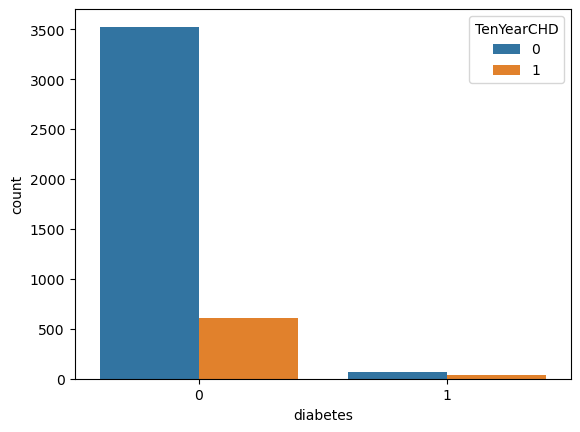

In [14]:
#diabetes with CHD

relation(data["diabetes"])
calculation(data, "TenYearCHD", "diabetes")

Insight: Those who have higher diabetes have higher risk of coronary heart disease in next 10 year

,NotRisk_with,Risk_with,percentage_Risk,percentage_NotRisk
totChol,,,,
107.0,0,1,100.0,0.0
113.0,1,0,0.0,100.0
119.0,1,0,0.0,100.0
124.0,0,1,100.0,0.0
126.0,1,0,0.0,100.0
...,...,...,...,...
439.0,0,1,100.0,0.0
453.0,1,0,0.0,100.0
464.0,0,1,100.0,0.0


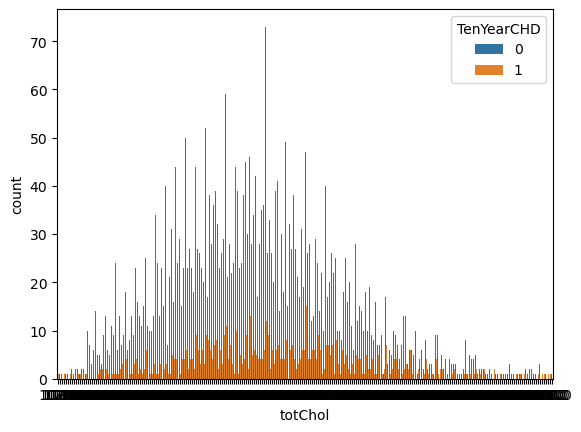

In [15]:
#totChol with CHD

relation(data["totChol"])
calculation(data, "TenYearCHD", "totChol")

Insight: Higher colestrol level person have higher risk

,NotRisk_with,Risk_with,percentage_Risk,percentage_NotRisk
sysBP,,,,
83.5,1,1,50.0,50.0
85.0,1,0,0.0,100.0
85.5,0,1,100.0,0.0
90.0,2,0,0.0,100.0
92.0,1,0,0.0,100.0
...,...,...,...,...
235.0,0,1,100.0,0.0
243.0,1,0,0.0,100.0
244.0,0,1,100.0,0.0


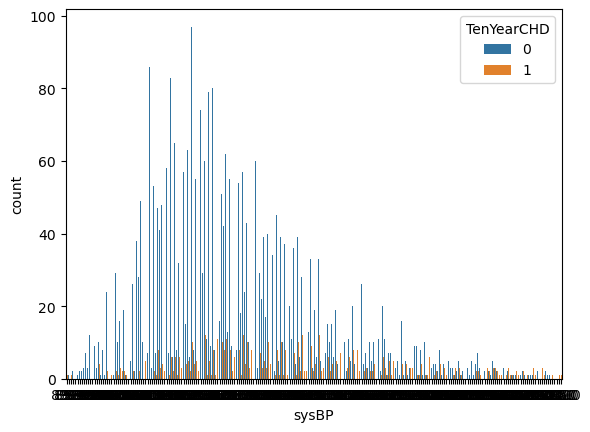

In [16]:
#sysBP with CHD

relation(data["sysBP"])
calculation(data, "TenYearCHD", "sysBP")

Insight: Higher BP person have higher risk of CHD in next 10 years

,NotRisk_with,Risk_with,percentage_Risk,percentage_NotRisk
cigsPerDay,,,,
0.0,1833,311,14.51,85.49
1.0,60,7,10.45,89.55
2.0,15,3,16.67,83.33
3.0,90,10,10.00,90.00
4.0,9,0,0.00,100.00
5.0,107,14,11.57,88.43
6.0,15,3,16.67,83.33
7.0,9,3,25.00,75.00
8.0,11,0,0.00,100.00


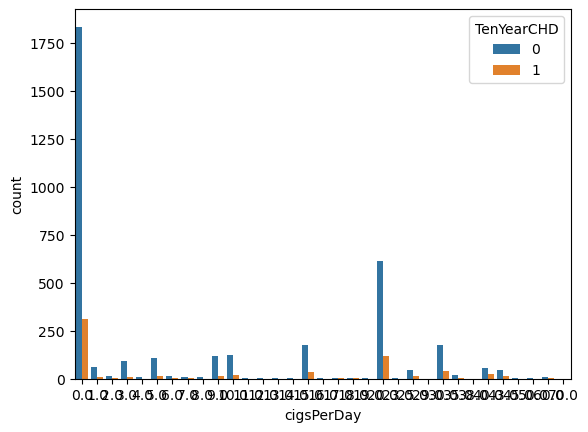

In [17]:

#cigsPerDay with CHD

relation(data["cigsPerDay"])
calculation(data, "TenYearCHD", "cigsPerDay")

Insight: Not showing the the direct relation between these two variable

Hence, we may drop the unrelevant variable like: education, cigsPerDay, currentSmoker

In [18]:
data.drop([ "education", "cigsPerDay", "currentSmoker"], inplace= True, axis=1)

### Handle missing values

In [19]:
pd.DataFrame(data.isnull().sum().sort_values(ascending=False))

,0
glucose,388
BPMeds,53
totChol,50
BMI,19
heartRate,1
male,0
age,0
prevalentStroke,0
prevalentHyp,0
diabetes,0


In [20]:
nullval= pd.DataFrame(data.isnull().sum().sort_values(ascending=False))
(nullval.sum()/len(data.index))*100

0    12.057574
dtype: float64

In [21]:
def impute(data, feature):
    return data[feature].fillna(data[feature].mode()[0], inplace=True)

In [22]:
impute(data, "glucose")
impute(data, "BPMeds")
impute(data, "totChol")
impute(data, "BMI")
impute(data, "heartRate")

In [23]:
data.isnull().sum()

male               0
age                0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Insight: The data is imbalanced dataset. Hence we have to make the data balance

### Upsampling of the Data

In [24]:
#All independent Variable

x=data.drop(["TenYearCHD"], axis=1)
x.head()

,male,age,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [25]:
#dependent Variable

y= data["TenYearCHD"]


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state= 9)

In [27]:
y_train.value_counts() #Imbalance data

TenYearCHD
0    2875
1     515
Name: count, dtype: int64

In [28]:
#Making the training data balance by upsampling

In [29]:
x_train["TenYearCHD"]=y_train
x_train.head()

,male,age,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3011,0,55,0.0,0,0,0,204.0,131.0,87.0,24.68,63.0,70.0,0
3575,1,56,0.0,0,0,0,186.0,116.0,67.0,24.62,70.0,83.0,0
3228,0,41,0.0,0,0,0,172.0,108.0,73.0,22.50,85.0,73.0,0
3593,0,48,0.0,0,0,0,244.0,117.0,81.5,28.96,67.0,78.0,0
199,1,60,0.0,0,0,0,240.0,137.0,84.0,29.51,82.0,88.0,0


In [30]:
majority_class = x_train[x_train['TenYearCHD'] == x_train['TenYearCHD'].value_counts().idxmax()]
print("Shape of majority_class:", majority_class.shape)

minority_class = x_train[x_train['TenYearCHD'] == x_train['TenYearCHD'].value_counts().idxmin()]
print("Shape of minority_class:", minority_class.shape)


majority_class_upsample=resample(majority_class, n_samples=5000, replace= True, random_state=42)
minority_upsample= resample(minority_class, n_samples=len(majority_class_upsample), replace=True, random_state=42)
data_upsampled= pd.concat([majority_class,minority_upsample] )

print(" ")

print("*********************************************************************")
print(" ")

print("Shape of majority_class_upsample:", majority_class_upsample.shape)
print("Shape of minority_upsample:", minority_upsample.shape)


Shape of majority_class: (2875, 13)
Shape of minority_class: (515, 13)
 
*********************************************************************
 
Shape of majority_class_upsample: (5000, 13)
Shape of minority_upsample: (5000, 13)


In [31]:
x_train_n= data_upsampled.drop(["TenYearCHD"], axis=1)
print("Independent Variables:", x_train_n.columns)

print(" ")
print("************************************************")
print(" ")

y_train_n= data_upsampled["TenYearCHD"]
print("Dependent Variable:", "TenYearCHD" )



Independent Variables: Index(['male', 'age', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')
 
************************************************
 
Dependent Variable: TenYearCHD


### Collinearity Check

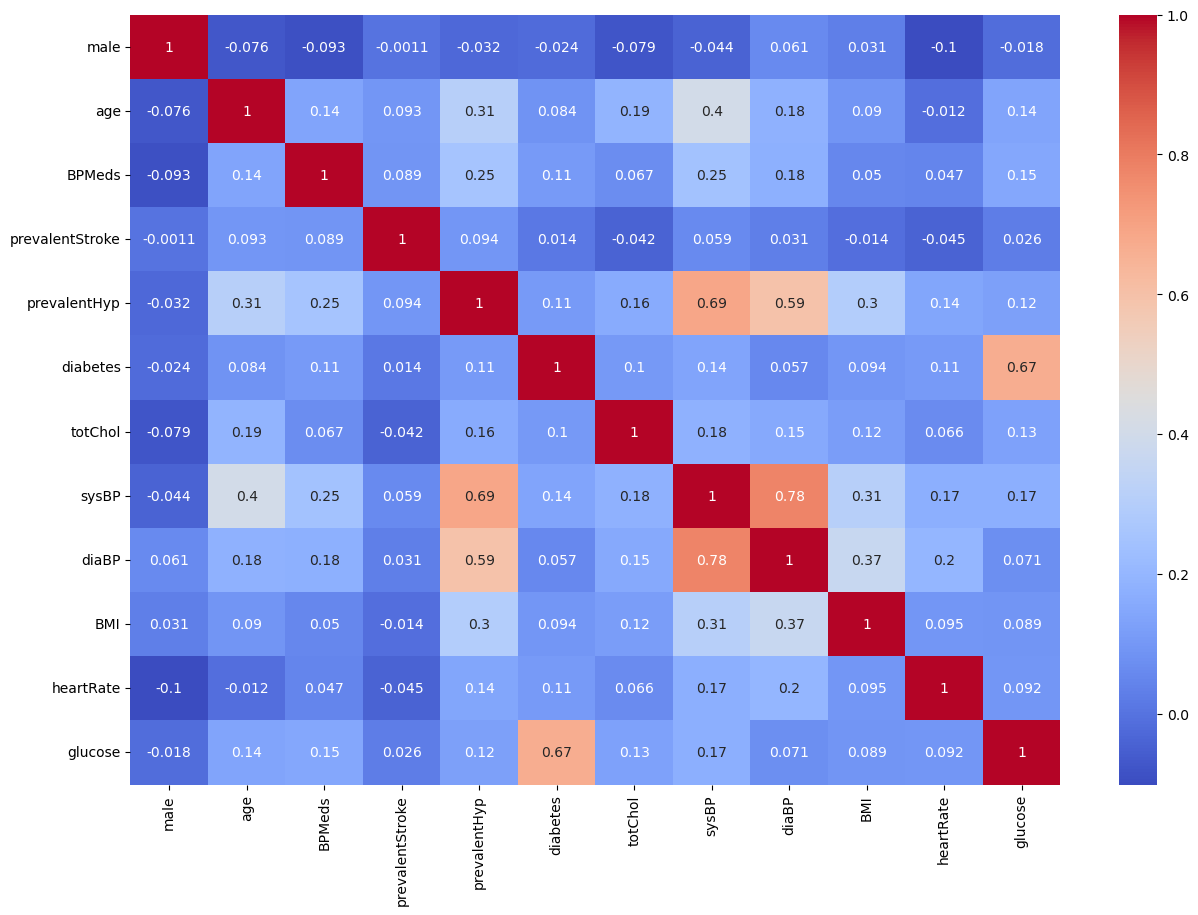

In [32]:
# Collinearity check

corr_matrix = x_train_n.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Insight: 

    1. sysBP highly correlated with diabetes and prevalenstroke
    2. diBP highly correlated with sysBP and prevalenstroke
    3. glucose is correlated with diabetes
  
    

### Multicollinearity Check

In [33]:
#Multicollinearity Check

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

vif_df = calculate_vif(data)
print(vif_df)

            Feature         VIF
0              male    1.843165
1               age   40.464009
2            BPMeds    1.131960
3   prevalentStroke    1.025817
4      prevalentHyp    2.345394
5          diabetes    1.560561
6           totChol   31.026025
7             sysBP  137.644212
8             diaBP  133.446932
9               BMI   44.566142
10        heartRate   36.979411
11          glucose   20.484078
12       TenYearCHD    1.280490


Insight: sysBP and diaBP has very high VIF. Hence we may choose to drop these column

In [34]:
#Dropping columns which have high VIF and high correlation

x_train_n.drop(["sysBP", "diaBP"], inplace= True, axis=1) 
x_test.drop(["sysBP", "diaBP"], inplace= True, axis=1)

### Standardization of the Data

In [35]:
#Standardization of the data before put into the model

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_n)
x_test_scaled = scaler.transform(x_test)

### Logistic Regression Model anf GridSearchCV


In [36]:
predict_heart_disease = LogisticRegression(penalty='l2', solver='liblinear',)
#predict_heart_disease.fit(x_train_scaled, y_train_n)

In [49]:
tuned_param= [{"C":[10**-4, 10**-3, 10**-2, 10**-1, 10,10**2, 10**3,10**4]}] #HyperparameterTuning
model=GridSearchCV(predict_heart_disease, tuned_param, scoring= "f1", verbose=1)
model.fit(x_train_scaled, y_train_n)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=LogisticRegression(C=0.1, penalty='l1',
                                          solver='liblinear'),
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000,
                                10000]}],
             scoring='f1', verbose=1)

In [38]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001999,0.003086,0.002713,0.004420,0.0001,{'C': 0.0001},0.763916,0.750834,0.766524,0.747983,0.767320,0.759315,0.008217,8
1,0.003172,0.000354,0.001027,0.000053,0.001,{'C': 0.001},0.785945,0.774931,0.785226,0.766347,0.792834,0.781057,0.009316,7
2,0.001823,0.001489,0.000399,0.000489,0.01,{'C': 0.01},0.786795,0.777528,0.792623,0.773756,0.787302,0.783601,0.006915,6
3,0.003149,0.006298,0.000000,0.000000,0.1,{'C': 0.1},0.785355,0.781404,0.792623,0.777678,0.790235,0.785459,0.005498,1
4,0.003153,0.003942,0.000000,0.000000,10,{'C': 10},0.785910,0.781055,0.792266,0.777678,0.789878,0.785357,0.005403,2
5,0.003126,0.006251,0.000000,0.000000,100,{'C': 100},0.785910,0.781055,0.792266,0.777678,0.789878,0.785357,0.005403,2
6,0.003124,0.006248,0.000000,0.000000,1000,{'C': 1000},0.785910,0.781055,0.792266,0.777678,0.789878,0.785357,0.005403,2
7,0.000000,0.000000,0.003126,0.006252,10000,{'C': 10000},0.785910,0.781055,0.792266,0.777678,0.789878,0.785357,0.005403,2


In [50]:
#Prediction for the test dataset

predict_heart_disease = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
predict_heart_disease.fit(x_train_scaled, y_train_n)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [46]:
predicted_y = predict_heart_disease.predict(x_test_scaled)
cm=confusion_matrix(y_test, predicted_y )
cm

array([[264, 455],
       [ 17, 112]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual')

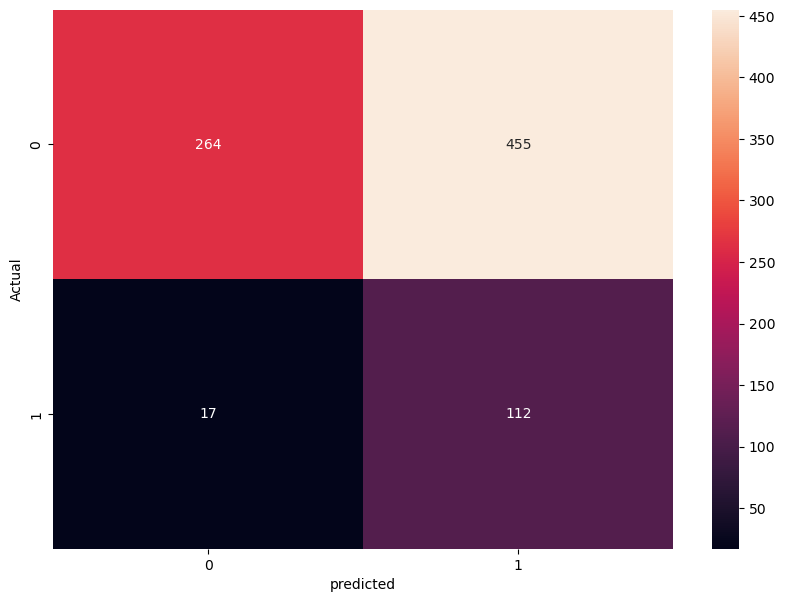

In [51]:
#Confusion Matrix

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, fmt='1g')
plt.xlabel('predicted')
plt.ylabel('Actual')

In [52]:
#Classification Report

cl_re=classification_report(y_test, predicted_y)
print(cl_re)


              precision    recall  f1-score   support

           0       0.94      0.37      0.53       719
           1       0.20      0.87      0.32       129

    accuracy                           0.44       848
   macro avg       0.57      0.62      0.42       848
weighted avg       0.83      0.44      0.50       848

